In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, LabelEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LinearRegression, Lasso, Ridge
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('cars_sampled.csv')
print(df)
print(df.isna().sum())

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,3/4/2016 15:48,Suche_VW_T5_Multivan,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN,3/4/2016 0:00,29690,5/4/2016 15:16
49997,27/03/2016 14:55,Suche_einen_originalen_VW_Golf_2_Fire_and_Ice_G60,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN,27/03/2016 0:00,50181,7/4/2016 11:45
49998,14/03/2016 18:51,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no,14/03/2016 0:00,86956,25/03/2016 6:17
49999,15/03/2016 18:06,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN,15/03/2016 0:00,65232,6/4/2016 17:15


*Оставляю по моему мнению самые важный признаки: все числовые и категориальные - 'brand', 'model', 'gearbox', 'fuelType', 'vehicleType'*

In [ ]:
df=df[['price', 'yearOfRegistration','powerPS', 'kilometer', 'brand', 'model', 'gearbox', 'fuelType', 'vehicleType']]

In [ ]:
plt.boxplot(df['price'])
plt.show()

def clean_em(df, name):
    Q1 =  df[name].quantile(0.25)
    Q3 = df[name].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[name] > (Q1-1.5*IQR)) & (df[name] < (Q3+1.5*IQR))]
df = clean_em(df, "price")
df = df[df['price'] != 0]
df.boxplot(column="price")

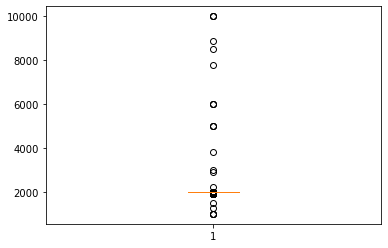

In [ ]:
plt.boxplot(df['yearOfRegistration'])
plt.show()

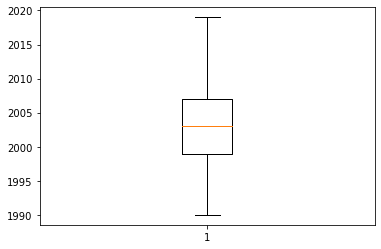

In [ ]:
df = df[(df['yearOfRegistration'] >= 1990) & (df['yearOfRegistration'] <=2021)]
plt.boxplot(df['yearOfRegistration'])
plt.show()

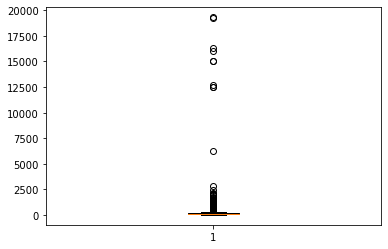

In [ ]:
plt.boxplot(df['powerPS'])
plt.show()

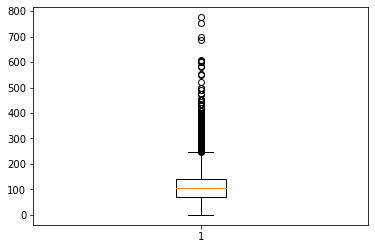

In [ ]:
df = df[df['powerPS']<800]
plt.boxplot(df['powerPS'])
plt.show()

<AxesSubplot:xlabel='gearbox', ylabel='price'>

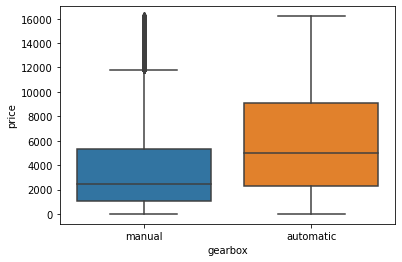

In [ ]:
sns.boxplot(x=df["gearbox"], y=df["price"])

<AxesSubplot:xlabel='fuelType', ylabel='price'>

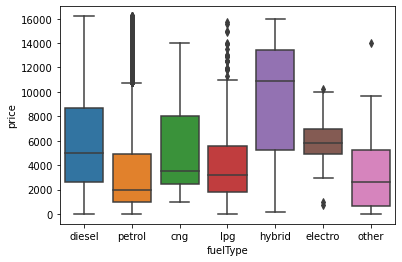

In [ ]:
sns.boxplot(x=df["fuelType"], y=df["price"])

In [ ]:
print(df['fuelType'].value_counts())
df.vehicleType.value_counts()

petrol     26954
diesel     12106
lpg          728
cng           80
hybrid        26
electro       13
other         11
Name: fuelType, dtype: int64

In [ ]:
df = df[(df.fuelType == 'petrol') | (df.fuelType == 'diesel')]
df = df[(df.vehicleType == 'limousine') | (df.vehicleType == 'small car') | (df.vehicleType == 'station wagon')]
print(df.isna().sum())
df = df.dropna()

In [ ]:
class action:
  def get_cols(df):
      '''
      функция возвращает список категориальных и числовых переменных
      '''
      categorical_feature_mask = df.dtypes == object
      number_feature_mask = df.dtypes != object
      numbers_cols = df.columns[number_feature_mask].tolist()
      categorical_cols = df.columns[categorical_feature_mask].tolist()
      return [numbers_cols, categorical_cols]

  def encode_categorial(name_scaler, scaler, data, y = None, return_scaler = False):
      if name_scaler != 'TargetEncoder':
          if not return_scaler:
              return data[categorical_cols].apply(lambda x: scaler.fit_transform(x.astype(str)))
          else:
              return data[categorical_cols].apply(lambda x: scaler.fit_transform(x.astype(str))), scaler
      else:
          if not return_scaler:
              return scaler.fit_transform(data[categorical_cols], y)
          else:
              return scaler.fit_transform(data[categorical_cols], y), scaler
      
  def encode_number(name_scaler, scaler, data, return_scaler = False):
      if name_scaler == 'Not scaled':
          if not return_scaler:
              return data
          else:
              return data, scaler
      else:
          if not return_scaler:
              return scaler.fit_transform(data)
          else:
              return scaler.fit_transform(data), scaler
  

In [ ]:
act = action()
scalers_categorial = {'LabelEncoder': LabelEncoder(), 
                     'TargetEncoder': TargetEncoder()}

mls = {
        'GradientBoostingRegressor': GradientBoostingRegressor(random_state=0), 
        'linear': LinearRegression(), 'RandomForestRegressor':RandomForestRegressor(max_depth=2, random_state=0),
        'LassoCV': LassoCV(), 'Ridge': RidgeCV(), 'ElasticNetCV': ElasticNetCV(),
       'ExtraTreesRegressor': ExtraTreesRegressor(n_estimators=100, random_state=0)
        }

scalers = {'StandardScaler': StandardScaler(), 'MinMaxScaler': MinMaxScaler(),
           'RobustScaler': RobustScaler(), 'Normalizer': Normalizer(), 'Not scaled': 0}
mlss = []
X = df.drop(['price'], axis = 1)
y = df['price']
numbers_cols, categorical_cols = act.get_cols(X)
for idd, (name_ml, ml) in enumerate(mls.items()):
    data = pd.DataFrame()
    for ide, (name_scaler_categorial, scaler_categorial) in enumerate(scalers_categorial.items()):
        data[categorical_cols] = act.encode_categorial(name_scaler_categorial, scaler_categorial, X[categorical_cols], y)
        
        for name_scaler, scaler in scalers.items():
            for name in numbers_cols:
                data[name] = 0
            
            data[numbers_cols] = act.encode_number(name_scaler, scaler, X[numbers_cols])

            
            X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=42, shuffle = True)
        
            model = ml.fit(X_train, y_train)

            mlss.append([name_ml, name_scaler_categorial, name_scaler, round(model.score(X_test, y_test),3)])
print(sorted(mlss, key = lambda x: x[3], reverse = True))

X = df.drop(['price'], axis = 1)
y = df['price']
numbers_cols, categorical_cols = act.get_cols(X)
data = pd.DataFrame()
data[categorical_cols] = act.encode_categorial('TargetEncoder', TargetEncoder(), X[categorical_cols], y)
for name in numbers_cols:
    data[name] = 0
data[numbers_cols] = act.encode_number('StandardScaler', StandardScaler(), X[numbers_cols])
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

reg = GradientBoostingRegressor(random_state=0)
model = reg.fit(X_train, y_train)
pred = model.predict(X_test)
print(r2_score(y_test, pred))

param={'learning_rate': sp_randFloat(),
      'subsample': sp_randFloat(),
      'n_estimators': sp_randInt(100, 1000),
      'max_depth': sp_randInt(4,10)}

reg = RandomizedSearchCV(reg, param, cv=10, scoring="r2", n_jobs=-1, random_state=0)
search=reg.fit(X_train, y_train)
print(search.best_score_, search.best_params_)

reg = GradientBoostingRegressor(learning_rate = 0.07103605819788694, max_depth = 5, 
                                n_estimators = 215, subsample = 0.36824153984054797)
model = reg.fit(X_train, y_train)
pred = model.predict(X_test)
print(r2_score(y_test, pred))